In [3]:
#dependencies
import os
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
import random
from datetime import datetime
from random import uniform
import requests as req
import json


#API keys
#OpenWeather API Key
from config import api_key1
#Google API Key
from config import api_key2

In [2]:
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [4]:
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [5]:
samplecity

,city,country
6971,terrace,ca
840,catalao,br
3966,santa cruz de tenerife,es
2865,mao,td
6452,albanel,ca
1121,ndola,zm
1497,bekasi,id
61,pareora,nz
490,kawana waters,au
7925,kayerkan,ru


In [6]:
apikey = api_key1
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print("No data for this city: {row['city']}")
        samplecity.drop([index])
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

/Users/cdw004/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/cdw004/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/cdw004/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/cdw004/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/cdw004/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:23: FutureWarning: set_value is de

This is city#: 1
This is: terrace
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=terrace
This is city#: 2
This is: catalao
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=catalao
This is city#: 3
This is: santa cruz de tenerife
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=santa cruz de tenerife
This is city#: 4
This is: mao
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=mao
This is city#: 5
This is: albanel
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=albanel
This is city#: 6
This is: ndola
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb28

This is city#: 47
This is: bad hofgastein
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=bad hofgastein
This is city#: 48
This is: sanchor
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=sanchor
This is city#: 49
This is: rong kwang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=rong kwang
This is city#: 50
This is: cubara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=cubara
This is city#: 51
This is: nagapattinam
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=nagapattinam
This is city#: 52
This is: tysmenytsya
This is the requested URL: http://api.openweathermap.org/data/2.5/we

This is city#: 93
This is: woodward
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=woodward
This is city#: 94
This is: betlitsa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=betlitsa
This is city#: 95
This is: bethlehem
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=bethlehem
This is city#: 96
This is: bay-ang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=bay-ang
This is city#: 97
This is: omura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=omura
This is city#: 98
This is: del rio
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390

This is city#: 139
This is: inyonga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=inyonga
This is city#: 140
This is: halberstadt
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=halberstadt
This is city#: 141
This is: kalaisan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=kalaisan
This is city#: 142
This is: cootamundra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=cootamundra
This is city#: 143
This is: narrabri
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=narrabri
This is city#: 144
This is: benalla
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?

This is city#: 185
This is: sergeyevka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=sergeyevka
This is city#: 186
This is: rio tuba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=rio tuba
This is city#: 187
This is: rangapara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=rangapara
This is city#: 188
This is: eura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=eura
This is city#: 189
This is: mindelo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=mindelo
This is city#: 190
This is: apatou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e7

This is city#: 232
This is: cedral
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=cedral
This is city#: 233
This is: nevsehir
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=nevsehir
This is city#: 234
This is: albacete
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=albacete
This is city#: 235
This is: yangjiang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=yangjiang
This is city#: 236
This is: damphu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=damphu
This is city#: 237
This is: warren
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756

This is city#: 278
This is: saraland
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=saraland
This is city#: 279
This is: medford
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=medford
No data for this city: {row['city']}
This is city#: 280
This is: bac can
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=bac can
This is city#: 281
This is: peresichna
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=peresichna
This is city#: 282
This is: brownsville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=brownsville
This is city#: 283
This is: pulaski
This is the requested URL: http://api.ope

This is city#: 324
This is: bayburt
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=bayburt
This is city#: 325
This is: mnogovershinnyy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=mnogovershinnyy
This is city#: 326
This is: szentlorinc
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=szentlorinc
This is city#: 327
This is: tempio pausania
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=tempio pausania
This is city#: 328
This is: santomera
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=santomera
This is city#: 329
This is: fort pierce
This is the requested URL: http://api.openweat

This is city#: 370
This is: kuruman
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=kuruman
This is city#: 371
This is: gombong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=gombong
This is city#: 372
This is: san ramon de la nueva oran
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=san ramon de la nueva oran
This is city#: 373
This is: ingraj bazar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=ingraj bazar
This is city#: 374
This is: istanbul
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=istanbul
This is city#: 375
This is: swan river
This is the requested URL: http://api.ope

This is city#: 416
This is: great yarmouth
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=great yarmouth
This is city#: 417
This is: callaway
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=callaway
This is city#: 418
This is: verkhnevilyuysk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=verkhnevilyuysk
This is city#: 419
This is: andujar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=andujar
This is city#: 420
This is: avinurme
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=avinurme
This is city#: 421
This is: huaiyuan
This is the requested URL: http://api.openweathermap.org/da

This is city#: 462
This is: harrisonburg
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=harrisonburg
This is city#: 463
This is: petaluma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=petaluma
This is city#: 464
This is: starosubkhangulovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=starosubkhangulovo
This is city#: 465
This is: tymovskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=tymovskoye
This is city#: 466
This is: zapadnaya dvina
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=zapadnaya dvina
This is city#: 467
This is: machinga
This is the requested URL: http://api

In [8]:
# print(len(samplecity))
type(samplecity['temperature'])
latitude = []
temperature = []
humidity = []
cloudy = []
windspeed = []

samplecity = samplecity[samplecity.latitude != ""]
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)

for index,row in samplecity.iterrows():
    latitude.append(row['latitude'])
    temperature.append(row['temperature'])
    humidity.append(row['humidity'])
    cloudy.append(row['cloudiness'])
    windspeed.append(row['wind_speed'])

# print(type(latitude[4]))
# print(latitude[4])
count = 0
index = 0
offend = []
for i in temperature:
    index += 1
    if type(i) != int:
        count += 1
        print(type(i))
        offend.append(index)
        print(i)

print(offend)
print(count)
# print(temperature[offend-1])
if count > 0:
    for i in offend:
        print(i)
        del temperature[i-1]
        del latitude[i-1]
        del humidity[i-1]
        del cloudy[i-1]
        del windspeed[i-1]

print(temperature)
print(len(temperature))

[]
0
[44, 73, 56, 76, 5, 63, 82, 62, -12, 33, 77, 42, 22, 65, 15, -4, 78, 86, 50, 93, 12, -3, 67, 41, 82, 57, 42, 64, 42, 72, -2, 64, 79, 44, 50, 44, 84, 34, 51, 73, 17, 32, 10, 30, 75, 78, 70, 81, 15, 57, 10, 98, 74, 33, 74, 42, 45, 30, 32, 79, 62, 44, 74, 75, 71, 57, 30, 57, 30, 24, 46, 79, 28, 73, 77, 91, 72, 77, 68, 19, -10, 38, 33, 31, 47, -4, 36, 80, 55, 77, -1, 83, 32, 85, 60, 28, 60, 78, 52, 56, 41, 68, 24, 58, 87, 70, 87, 44, 52, 72, 69, 5, 83, 68, 21, 43, 62, 30, 58, 68, 79, 80, 27, 29, 67, 22, 57, 17, 89, 76, 91, 77, 85, 46, 12, 77, 70, 52, 62, -6, 59, 26, 44, 67, 84, 60, 54, 59, 37, 76, 31, 40, 28, 75, 75, 98, 60, 14, 69, 48, 60, 32, 28, 64, 14, 40, 69, 29, 28, 69, 23, 82, 63, 27, 44, 75, 82, 67, 28, 32, 73, 12, 63, 70, 70, 19, 59, 31, 81, 49, 51, -8, 83, 61, 70, 34, 63, 21, 79, 85, 37, 78, 77, 64, 1, 68, 72, 9, 59, 8, 81, 15, 68, -4, 47, 54, 40, 39, 71, 59, 31, -15, 67, 71, 77, 20, -3, 26, 45, 69, -5, 39, 63, 51, 19, 15, 52, 54, 54, 78, 53, 34, 77, 24, 24, 12, 62, 20, 66, 

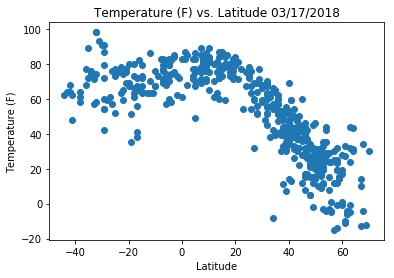

In [9]:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)
# plt.scatter(latitude, temperature)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()